In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv(r'C:\Users\scast\Downloads\healthcare-dataset-stroke-data.csv',index_col='id')

Bmi

In [3]:
X.bmi[X.bmi.isnull()]=X.bmi.mean()
X.bmi.isnull().sum()

C:\Users\scast\AppData\Local\Temp\ipykernel_21912\4069817168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.bmi[X.bmi.isnull()]=X.bmi.mean()


0

Gender

In [4]:
X.gender

id
9046       Male
51676    Female
31112      Male
60182    Female
1665     Female
          ...  
18234    Female
44873    Female
19723    Female
37544      Male
44679    Female
Name: gender, Length: 5110, dtype: object

In [5]:
X.age=X.age.astype('int64')
X.age.dtype
X['gender'].replace({'Male':3,'Female':1,'Other':2},inplace=True)
X['gender']=X['gender'].astype('uint8')
X.gender.head(5)

id
9046     3
51676    1
31112    3
60182    1
1665     1
Name: gender, dtype: uint8

Hypertension

In [6]:
X.hypertension.head(5)

id
9046     0
51676    0
31112    0
60182    0
1665     1
Name: hypertension, dtype: int64

In [7]:
X.hypertension=X.hypertension.astype('uint8')
X.heart_disease=X.heart_disease.astype('uint8')

Smoking_status

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['smoking_status'] = label_encoder.fit_transform(X['smoking_status'])
X.smoking_status=X.smoking_status.astype('uint8')
X['smoking_status']

id
9046     1
51676    2
31112    2
60182    3
1665     2
        ..
18234    2
44873    2
19723    2
37544    1
44679    0
Name: smoking_status, Length: 5110, dtype: uint8

Ever_married

In [9]:
X.ever_married[X.ever_married=='Yes']=1
X.ever_married[X.ever_married=='No']=0
X.ever_married=X.ever_married.astype('uint8')

C:\Users\scast\AppData\Local\Temp\ipykernel_21912\1432385700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.ever_married[X.ever_married=='Yes']=1
C:\Users\scast\AppData\Local\Temp\ipykernel_21912\1432385700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.ever_married[X.ever_married=='No']=0


Residence_type

In [10]:
X.Residence_type[X.Residence_type=='Rural']=1
X.Residence_type[X.Residence_type=='Urban']=0
X.Residence_type=X.Residence_type.astype('uint8')

C:\Users\scast\AppData\Local\Temp\ipykernel_21912\2628917861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Residence_type[X.Residence_type=='Rural']=1
C:\Users\scast\AppData\Local\Temp\ipykernel_21912\2628917861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Residence_type[X.Residence_type=='Urban']=0


Work_type

In [11]:
print(X.work_type[X.work_type=='Govt_job'].count())
print(X.work_type[X.work_type=='Never_worked'].count())
print(X.work_type[X.work_type=='Private'].count())
print(X.work_type[X.work_type=='Self-employed'].count())
print(X.work_type[X.work_type=='children'].count())

657
22
2925
819
687


In [12]:
X = pd.concat([X, pd.get_dummies(X['work_type'])], axis=1)
X = X * 1
X.drop('work_type', axis=1, inplace=True)
X.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
id,,,,,,,,,,,,,,,
9046,3,67,0,1,1,0,228.69,36.600000,1,1,0,0,1,0,0
51676,1,61,0,0,1,1,202.21,28.893237,2,1,0,0,0,1,0
31112,3,80,0,1,1,1,105.92,32.500000,2,1,0,0,1,0,0
60182,1,49,0,0,1,0,171.23,34.400000,3,1,0,0,1,0,0
1665,1,79,1,0,1,1,174.12,24.000000,2,1,0,0,0,1,0
56669,3,81,0,0,1,0,186.21,29.000000,1,1,0,0,1,0,0
53882,3,74,1,1,1,1,70.09,27.400000,2,1,0,0,1,0,0
10434,1,69,0,0,0,0,94.39,22.800000,2,1,0,0,1,0,0
27419,1,59,0,0,1,1,76.15,28.893237,0,1,0,0,1,0,0


In [13]:
X.shape,X.dtypes

((5110, 15),
 gender                 uint8
 age                    int64
 hypertension           uint8
 heart_disease          uint8
 ever_married           uint8
 Residence_type         uint8
 avg_glucose_level    float64
 bmi                  float64
 smoking_status         uint8
 stroke                 int64
 Govt_job               int32
 Never_worked           int32
 Private                int32
 Self-employed          int32
 children               int32
 dtype: object)

Mapa de correlación

<Axes: >

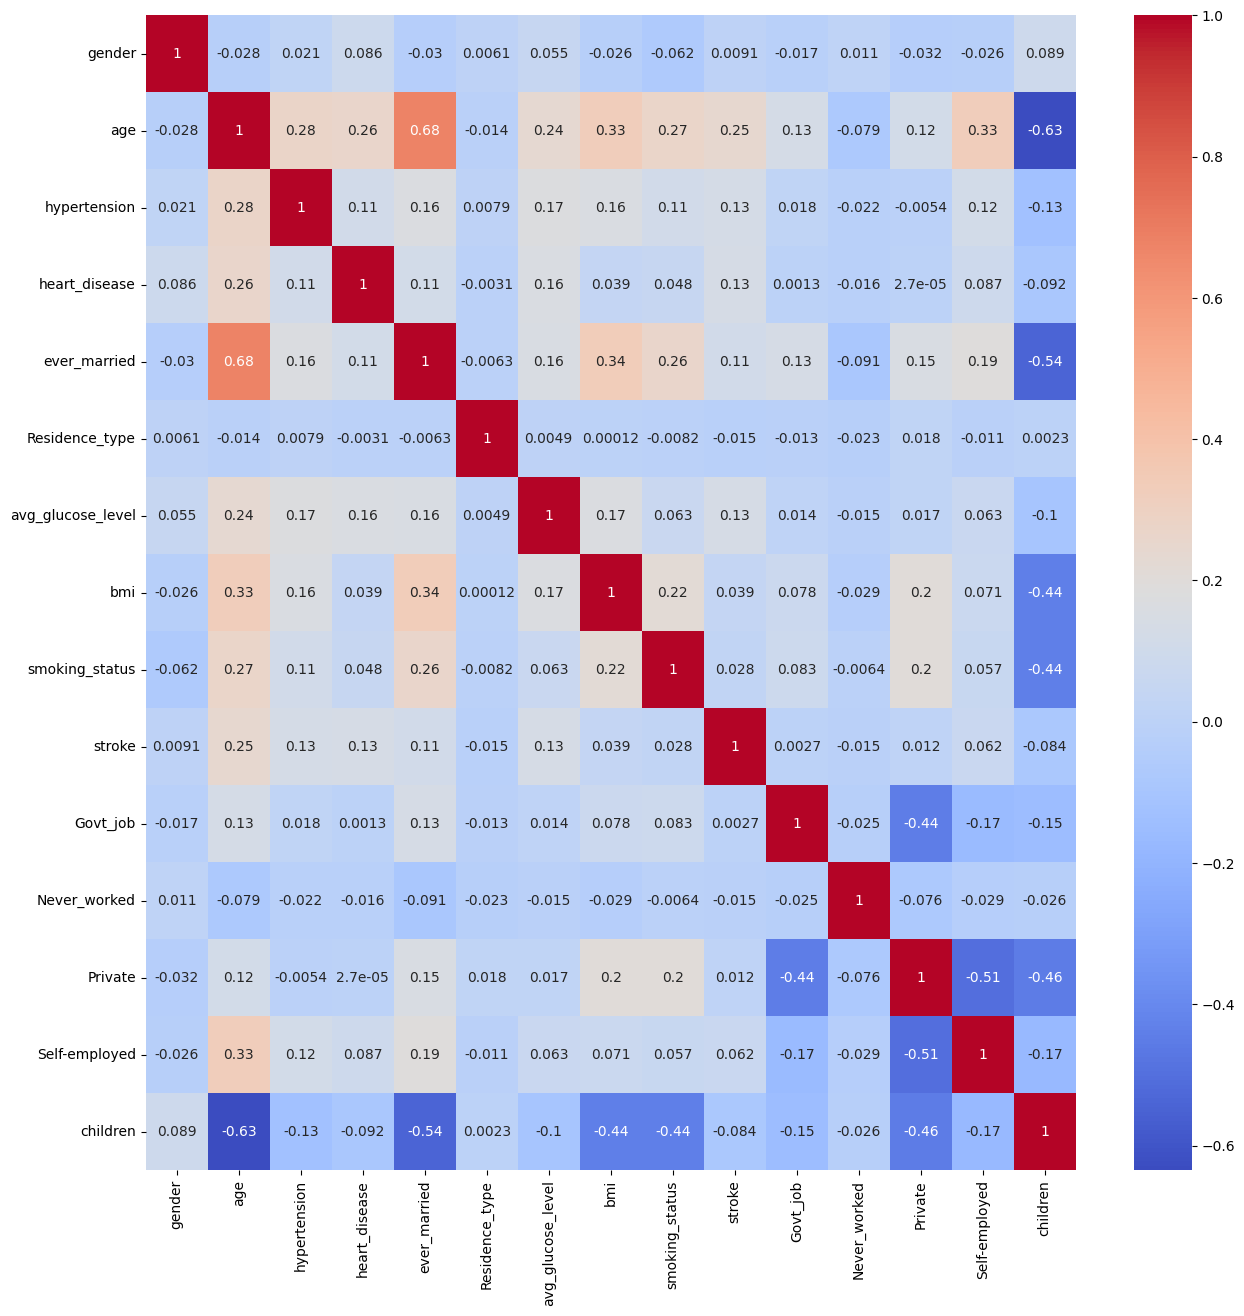

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

In [16]:
y=X['stroke']
X.drop('stroke',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(X,y,test_size=0.25, random_state=1)